<a href="https://colab.research.google.com/github/TBSMxharshal/College-Students-EDA/blob/main/IPL_Auction_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv("iplauction2023.csv")
df.head(5)

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [ ]:
df.rename_axis("Auction no")
df.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [ ]:
df.columns

Index(['name', 'player style', 'nationality', 'base price (in lacs)',
       'final price (in lacs)', 'franchise', 'status'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    object 
 1   player style           309 non-null    object 
 2   nationality            309 non-null    object 
 3   base price (in lacs)   151 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    object 
 6   status                 309 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.0+ KB


In [ ]:
df.describe()

,base price (in lacs),final price (in lacs)
count,151.000000,238.000000
mean,59.205298,368.067227
std,59.688337,449.070117
min,20.000000,20.000000
25%,20.000000,21.250000
50%,20.000000,150.000000
75%,75.000000,625.000000
max,200.000000,1850.000000


In [ ]:
# finding the missing values
df.isnull().sum()

,0
name,0
player style,0
nationality,0
base price (in lacs),158
final price (in lacs),71
franchise,71
status,0


In [ ]:
franchise = df['franchise'].value_counts().reset_index().rename(columns = {'count':'player owned'})

<Axes: xlabel='count', ylabel='franchise'>

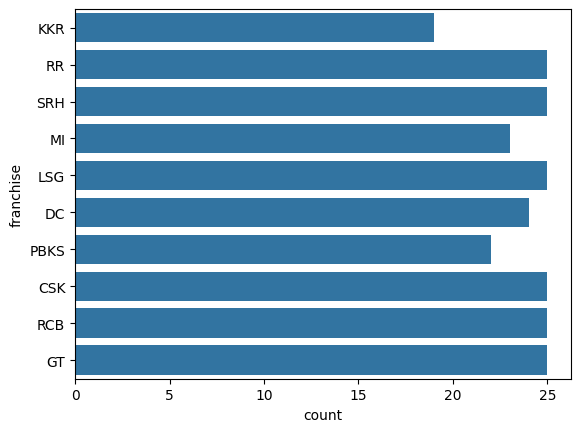

In [ ]:
sns.countplot(df['franchise'])

In [ ]:
df.dtypes

,0
name,object
player style,object
nationality,object
base price (in lacs),float64
final price (in lacs),float64
franchise,object
status,object


In [ ]:
franchise_name = df['franchise'].value_counts().index
franchise_name

Index(['RR', 'SRH', 'LSG', 'CSK', 'RCB', 'GT', 'DC', 'MI', 'PBKS', 'KKR'], dtype='object', name='franchise')

In [ ]:
franchise_val = df['franchise'].value_counts().values
franchise_val

array([25, 25, 25, 25, 25, 25, 24, 23, 22, 19])

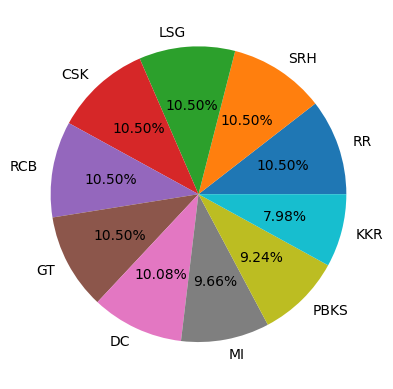

In [ ]:
plt.pie(franchise_val, labels = franchise_name, autopct = '%1.2f%%')
plt.show()

In [ ]:
# No of player retained by each freachise
df[df['status']=="RETAINED"].groupby("franchise").size().reset_index().rename(columns = {0:'player retained'}).sort_values(by = 'player retained', ascending = False)

,franchise,player retained
1,DC,19
0,CSK,18
2,GT,18
7,RCB,18
6,PBKS,16
8,RR,16
4,LSG,15
5,MI,15
9,SRH,12
3,KKR,11


# **Obseravtion:**

1.   DC have the most player retained
2.   KKR have the least player retained


In [ ]:
# which player is sold the maximum amount
df.columns

Index(['name', 'player style', 'nationality', 'base price (in lacs)',
       'final price (in lacs)', 'franchise', 'status'],
      dtype='object')

In [ ]:
# top sold player
df.groupby('name')['final price (in lacs)'].max()

,final price (in lacs)
name,
Abdul Basith,20.0
Abdul Samad,400.0
Abhimanyu Easwaran,NaN
Abhinav Manohar Sadarangani,260.0
Abhishek Sharma,650.0
...,...
Yash Thakur,45.0
Yashasvi Jaiswal,400.0
Yudhvir Singh Charak,20.0


In [ ]:
top_sold_player = df.loc[df['final price (in lacs)'].idxmax()]
top_sold_player
# loc is used to give the corrosponding to the index returnd
#idmax() gives the index corrosponding to it

,150
name,Sam Curran
player style,Allrounder
nationality,England
base price (in lacs),200.0
final price (in lacs),1850.0
franchise,PBKS
status,SOLD


In [ ]:
min_sold_player = df.loc[df['final price (in lacs)'].idxmin()]
min_sold_player

,0
name,Harshit Rana
player style,Bowler
nationality,India
base price (in lacs),NaN
final price (in lacs),20.0
franchise,KKR
status,RETAINED


In [ ]:
# player unsold in the auction
df[df['status']=="UNSOLD"]

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
6,Prashant Chopra,Allrounder,India,20.0,NaN,NaN,UNSOLD
10,Luke Wood,Bowler,England,100.0,NaN,NaN,UNSOLD
11,Dilshan Madushanka,Bowler,Sri Lanka,50.0,NaN,NaN,UNSOLD
...,...,...,...,...,...,...,...
137,Mujeeb Ur Rahman,Bowler,Afghanistan,100.0,NaN,NaN,UNSOLD
138,Tabraiz Shamsi,Bowler,South Africa,100.0,NaN,NaN,UNSOLD
141,Adam Milne,Bowler,New Zealand,200.0,NaN,NaN,UNSOLD
143,Chris Jordan,Bowler,England,200.0,NaN,NaN,UNSOLD


In [ ]:
# on the basis on nationality
df[df['status']=="UNSOLD"].groupby('nationality').size().reset_index().rename(columns = {0:'player unsold'})

,nationality,player unsold
0,Afghanistan,3
1,Australia,3
2,Bangladesh,1
3,England,9
4,India,39
5,Ireland,1
6,Netherlands,1
7,New Zealand,3
8,South Africa,4
9,Sri Lanka,4


In [ ]:
player_unsold = df[df['status']=="UNSOLD"].groupby('nationality').size().reset_index().rename(columns = {0:'player unsold'})

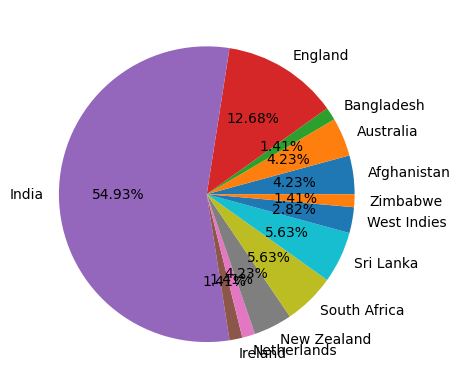

In [ ]:
# plt a pie chart of the unsold player
plt.pie(player_unsold['player unsold'], labels = player_unsold['nationality'], autopct = '%1.2f%%')
plt.show()

In [ ]:
retained_player = df[df['status']=="RETAINED"].groupby("franchise").size().reset_index().rename(columns = {0:'player retained'}).sort_values(by = 'player retained', ascending = False)

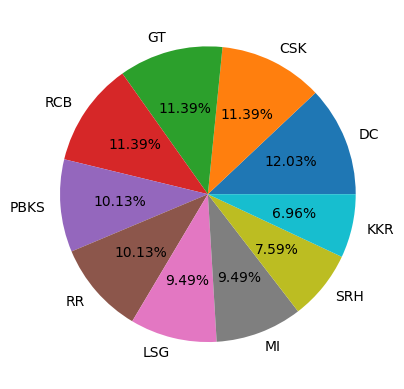

In [ ]:
plt.pie(retained_player['player retained'], labels = retained_player['franchise'], autopct = '%1.2f%%')
plt.show()

In [ ]:
# pie chart of player not retained
sold_player = df[df['status']=="SOLD"].groupby("franchise").size().reset_index().rename(columns = {0:'player sold'}).sort_values(by = 'player sold', ascending = False)
sold_player

,franchise,player sold
9,SRH,13
4,LSG,10
8,RR,9
3,KKR,8
5,MI,8
0,CSK,7
2,GT,7
7,RCB,7
6,PBKS,6
1,DC,5


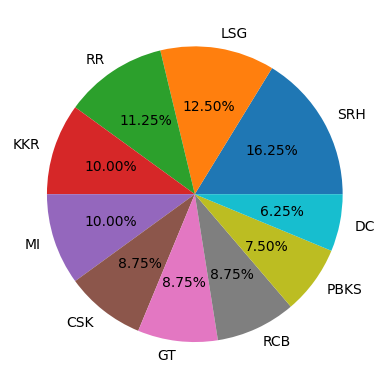

In [ ]:
plt.pie(sold_player['player sold'], labels = sold_player['franchise'], autopct = '%1.2f%%')
plt.show()

In [ ]:
# highest sold player in each team
d = df.groupby('final price (in lacs)')['franchise'].max().reset_index()
d

,final price (in lacs),franchise
0,20.0,SRH
1,25.0,SRH
2,30.0,RR
3,40.0,PBKS
4,45.0,LSG
...,...,...
62,1600.0,MI
63,1625.0,CSK
64,1700.0,LSG
65,1750.0,MI


In [ ]:
idx = df.groupby('franchise')['final price (in lacs)'].idxmax()
highest_sold_players = df.loc[idx, ['franchise', 'name', 'final price (in lacs)']].reset_index(drop = True)
highest_sold_players

,franchise,name,final price (in lacs)
0,CSK,Ben Stokes,1625.0
1,DC,Rishabh Pant,1600.0
2,GT,Rashid Khan,1500.0
3,KKR,Shreyas Iyer,1225.0
4,LSG,KL Rahul,1700.0
5,MI,Cameron Green,1750.0
6,PBKS,Sam Curran,1850.0
7,RCB,Virat Kohli,1500.0
8,RR,Sanju Samson,1400.0
9,SRH,Harry Brook,1325.0


<Axes: xlabel='franchise', ylabel='final price (in lacs)'>

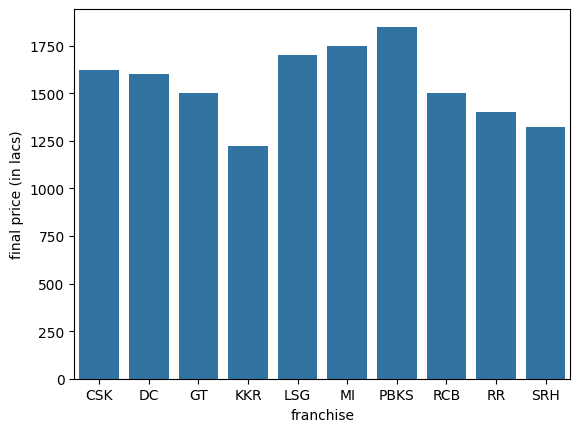

In [ ]:
# plot a bar graph of the above
sns.barplot(x = 'franchise', y = 'final price (in lacs)', data = highest_sold_players)